In [24]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/label_encoder.py

# Biology

### Try with Random Forest

In [2]:
def MAD(Y, YP): #MAE - MEAN ABSOLUTE ERROR FOR ME
    """Returns the mean loss"""
    m = np.mean(abs(Y-YP))
    return m

In [16]:
def plot_predictions_KF(Model, target, X, Y, kf): #PERFECT FUNCTION - DECIDED IF LET IT GET THE SCORES OR NOT
    """Required the Model/Estimator
    The target
    X is the predictive features
    Y is the data that contains all the TARGETS
    and kf is the object of Kfolds
    Returns the Mean Score and the Plots(of each KFold) with the individual score"""
    plot_rows = int(np.ceil(len(kf)/3)) #Number of rows to plot
    fig, axes = plt.subplots(plot_rows, 3, sharex=False, figsize=(14, plot_rows*4))
    axs = [i for i in axes.flatten()]
    sc = []
    j = 0
    for n, i in (kf):
        ax = axs[j]
        Model.fit(X.iloc[n], Y[target].iloc[n])
        Y_pred = Model.predict(X.iloc[i])
        ##################PRUEBA, QUITANDO LOS OUTLIERS EXAGERADOS###############
        ##ind = (Y_pred > 0) & (Y_pred < 100)
        #Y_pred2 = Y_pred[ind] 
        score = MAD(Y[target].iloc[i], Y_pred) #HERE THE MAE IS CALCULATED
        ########################################################################
        ax.plot(Y[target].iloc[i], Y_pred, 'go', label='Prediction')
        ax.plot(Y[target].iloc[i], Y[target].iloc[i]) #RECTA DE REGRESION PERFECTA
        ax.set_title('Fold: '+str(j)+'. Score: '+str(score))
        ax.set_xlabel('Real_Value')
        ax.set_ylabel('Prediction')
        ax.legend()
        j += 1
        sc.append(score)
        ax.grid()
    print('Mean Score:', np.mean(sc))
    plt.tight_layout(h_pad=2)

In [4]:
def get_exp_prediction(estimator, exp, S_Data, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the estimator
    The exponent
    The sorted data by values of the target to predict
    The column(target) that will be analyzed
    The number of folds that will be created
    KFShuffle if True the Kfolds shuffle the data before split it
    shuffle_split if True the function DON'T use Kfolds, instead use a ShuffleSplit object
    And return the score of the model, and the plot of the prediction"""
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = S_Data.columns.difference(y_list)
    New_X = S_Data.filter(items = X_list)
    exped_X = New_X**exp
    Y_train = S_Data.filter(items = y_list)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(exped_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    print('The Model with the Data raised to the power of', exp, 'gives:')
    plot_predictions_KF(estimator, target, exped_X, Y_train, kf)

In [5]:
def get_Poly_prediction(estimator, deg, D_sorted, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = D_sorted.columns.difference(y_list)
    New_X = D_sorted.filter(items = X_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    Poly_X = pd.DataFrame(Poly_X)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(Poly_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    plot_predictions_KF(estimator, target, Poly_X, Y_train, kf)
    print('The prediction took:', time()-start_time, 'seconds')

In [6]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

In [7]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

### Con Kfold  5

Mean Score: 6.00260209828


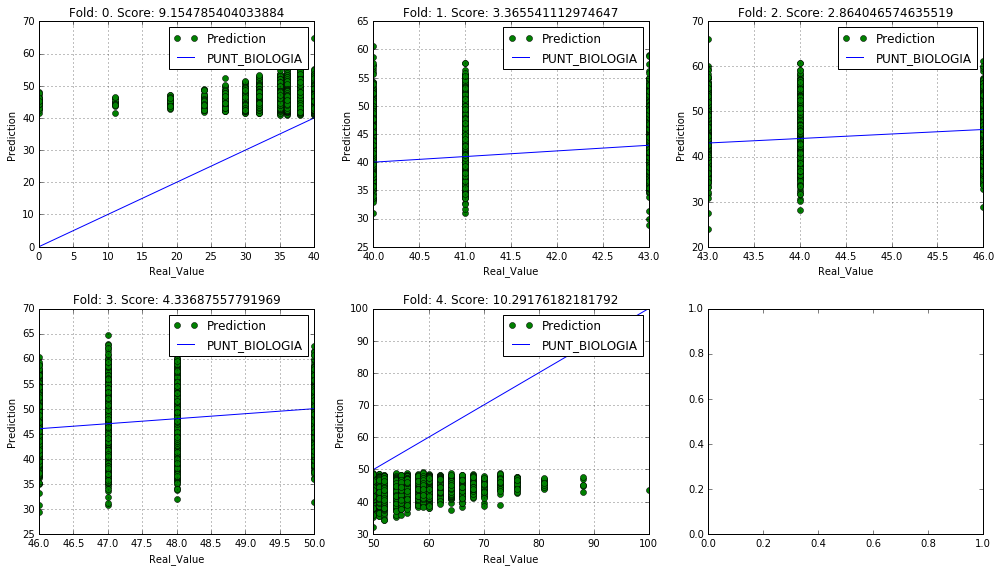

In [11]:
rf = RandomForestRegressor()
kf = KFold(X.shape[0], n_folds=5)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, kf)

### Con Kfold  5 y Shuffle  True

Mean Score: 4.52981912392


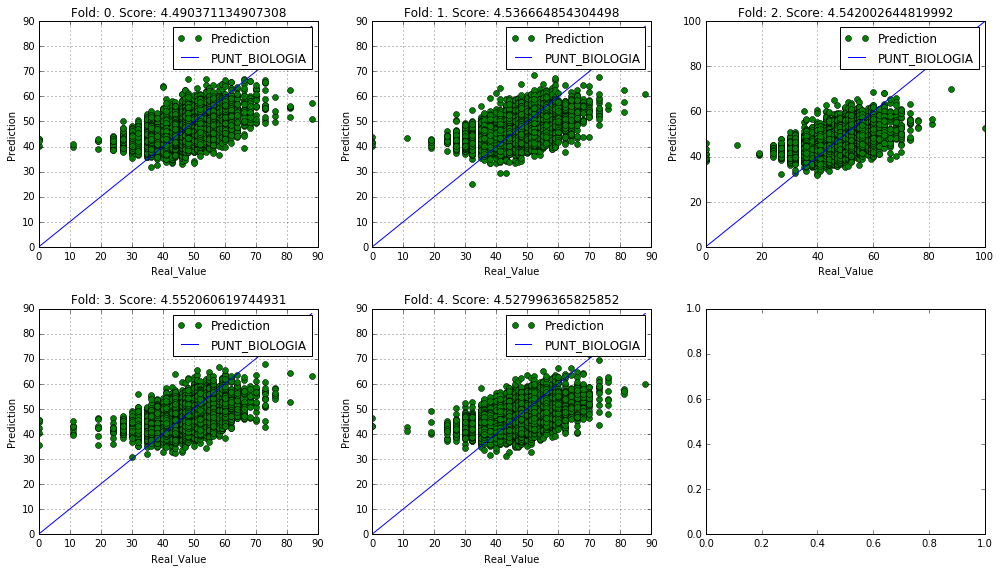

In [12]:
rf = RandomForestRegressor()
kf = KFold(X.shape[0], n_folds=5, shuffle = True)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, kf)

### Con ShuffleSplit

Mean Score: 4.51037767365


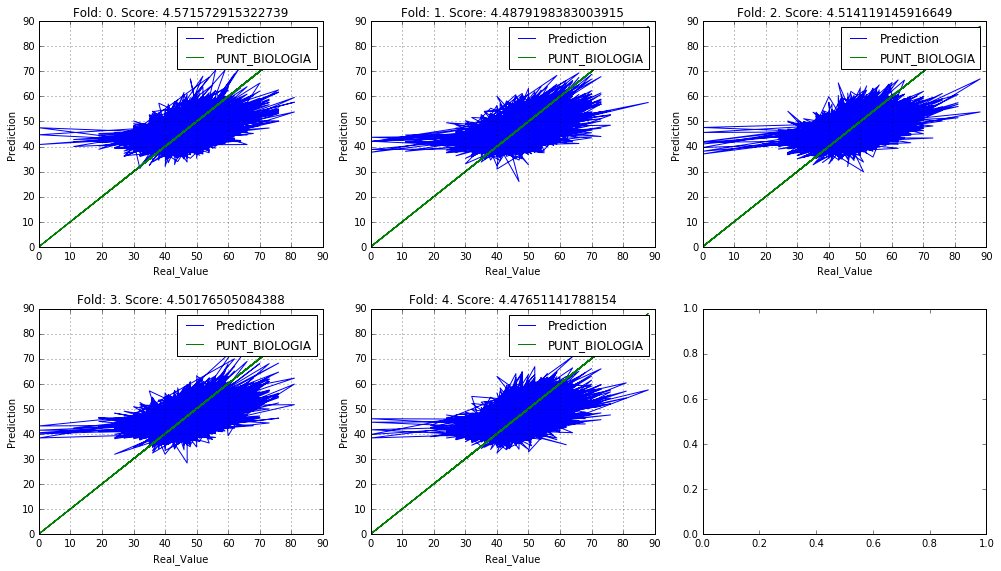

In [15]:
rf = RandomForestRegressor()
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, rs)

### Exp  2

The Model with the Data raised to the power of 2 gives:
Mean Score: 6.00530565426


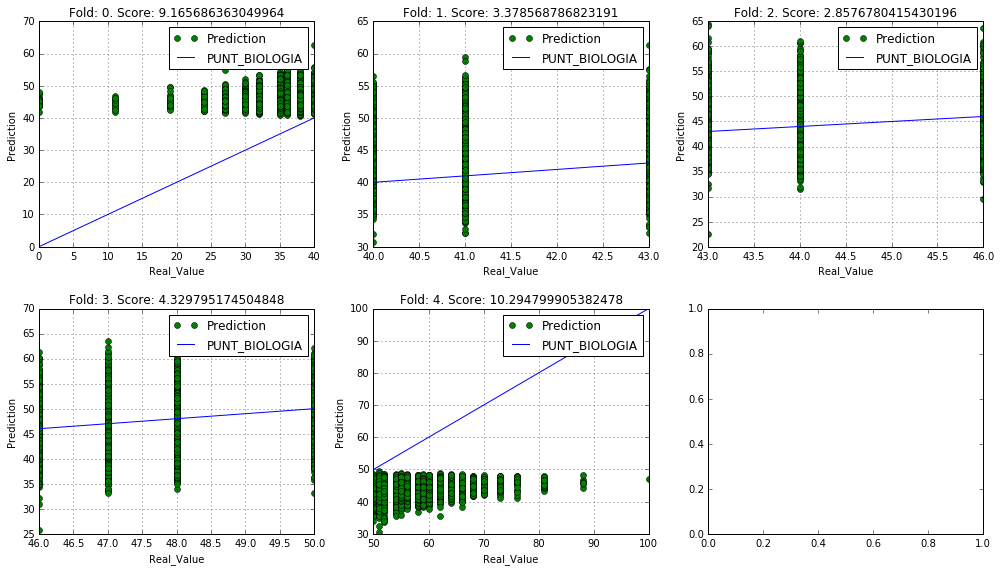

In [17]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.51606113959


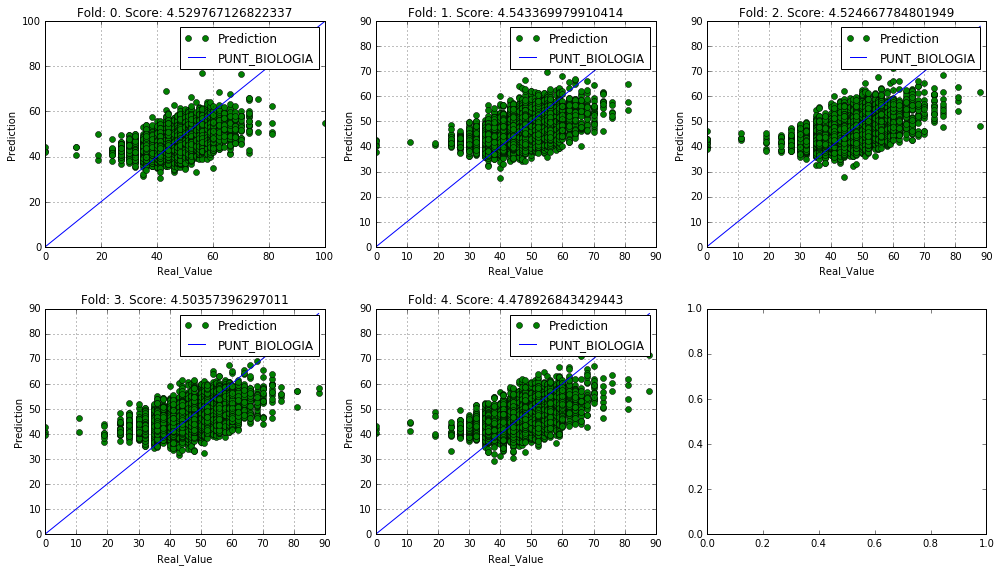

In [18]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.52440508752


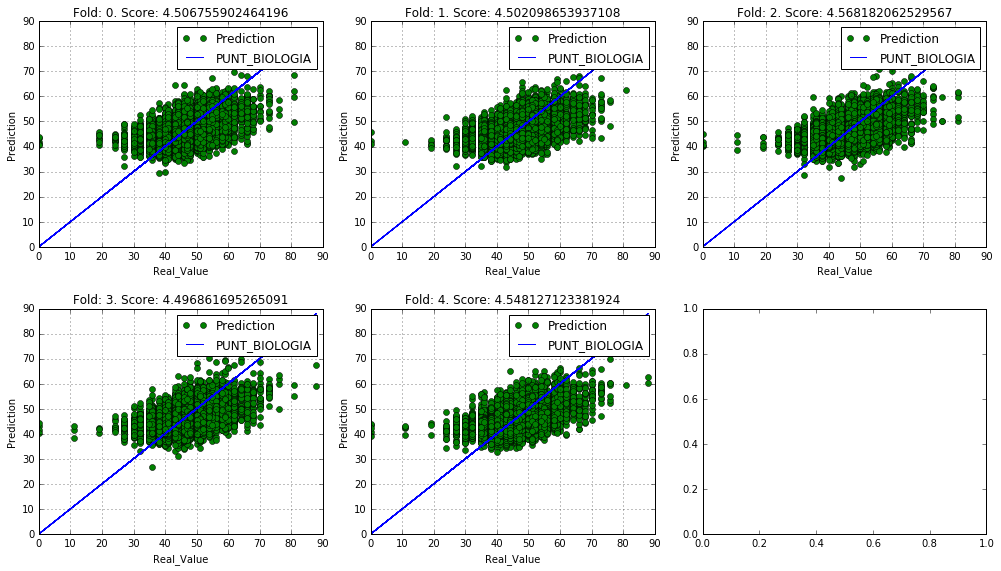

In [19]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)

### EXP 3

The Model with the Data raised to the power of 3 gives:
Mean Score: 6.01001039265


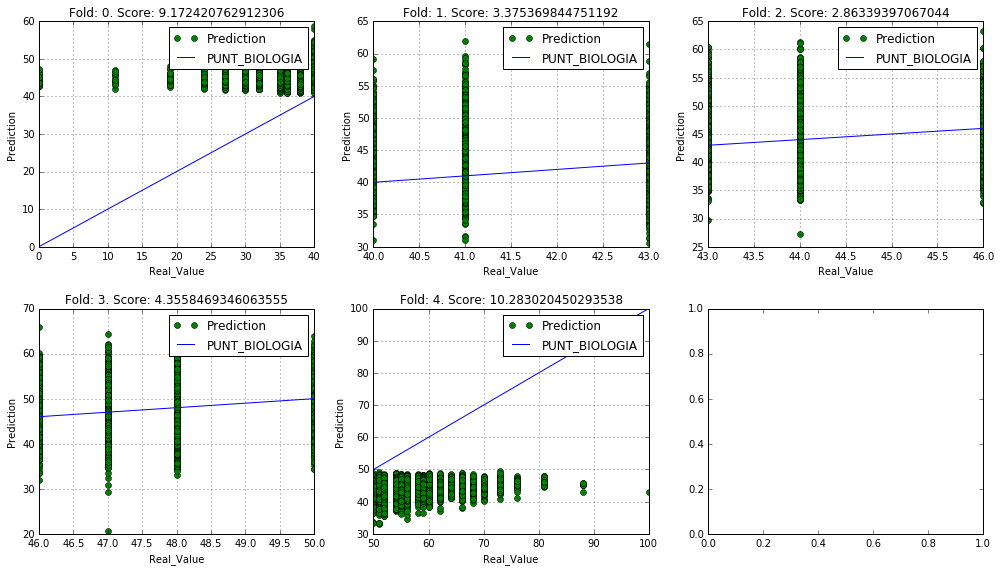

In [20]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.52042813347


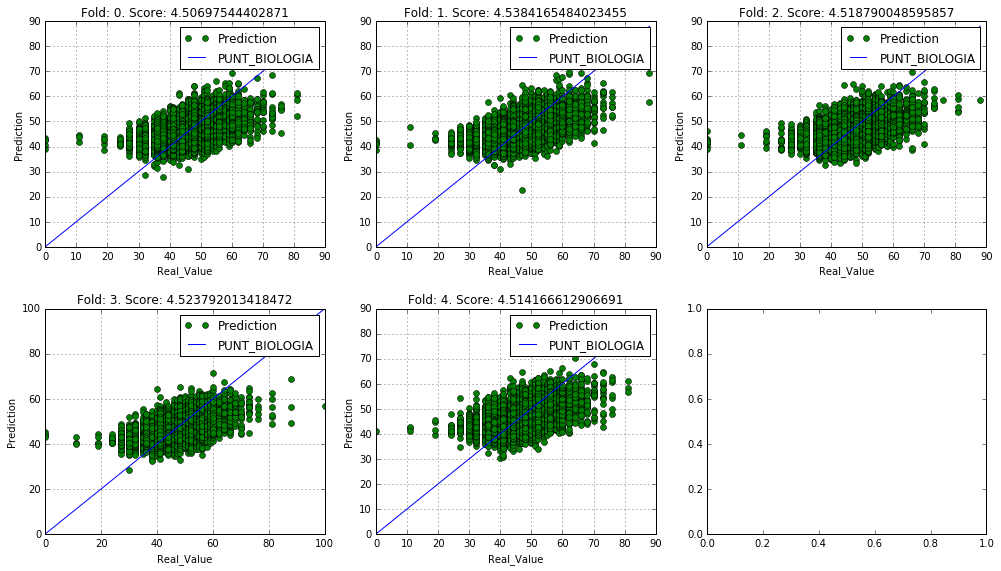

In [21]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.53278636858


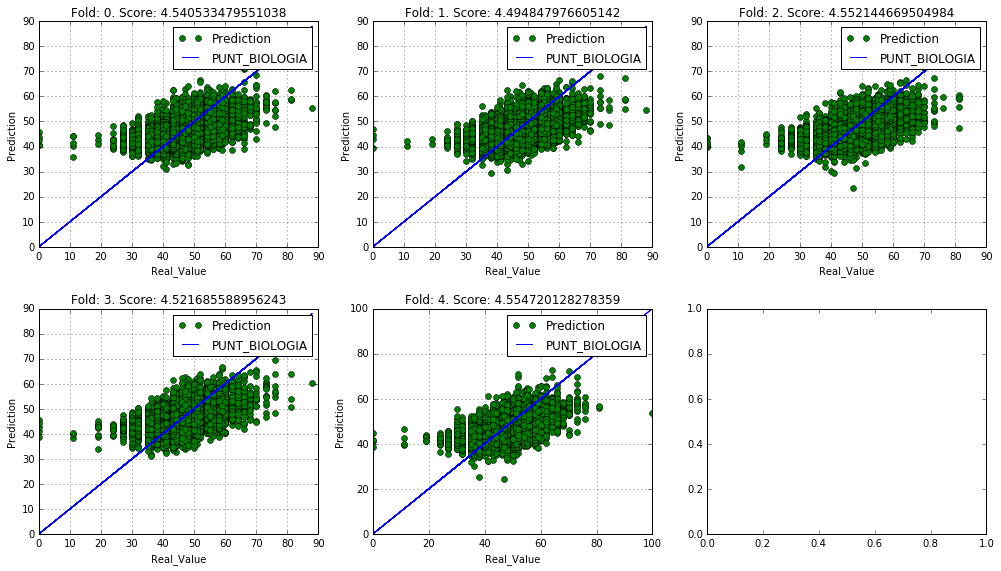

In [22]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)

### Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 5.99884023652
The prediction took: 1543.2259378433228 seconds


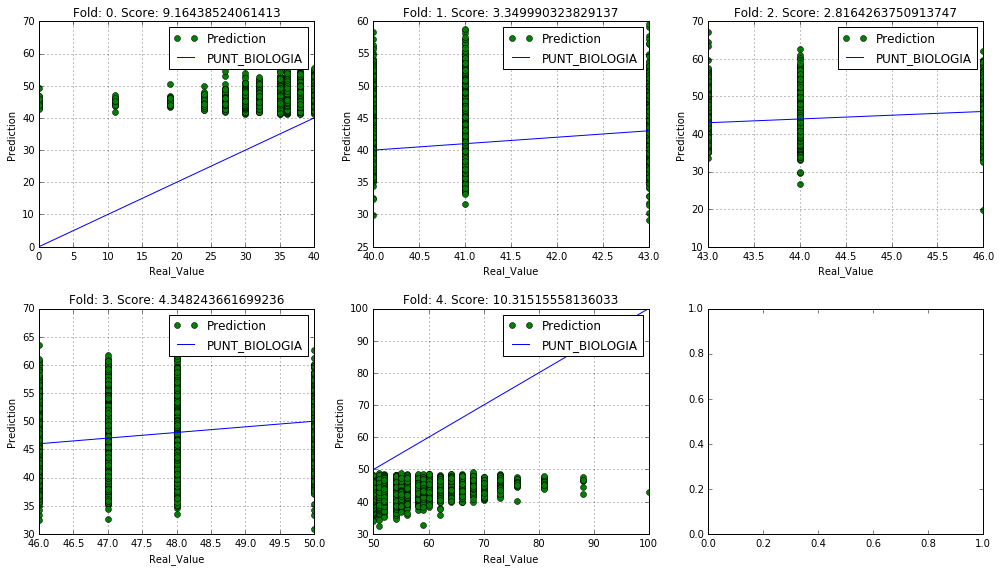

In [25]:
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.52751650796
The prediction took: 1422.5421695709229 seconds


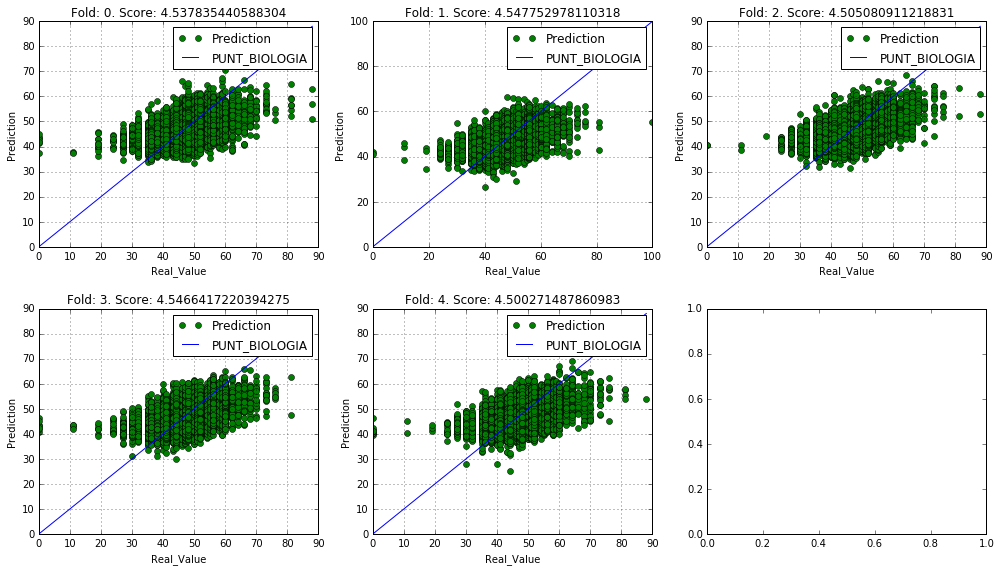

In [26]:
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.51845563092
The prediction took: 1438.4852969646454 seconds


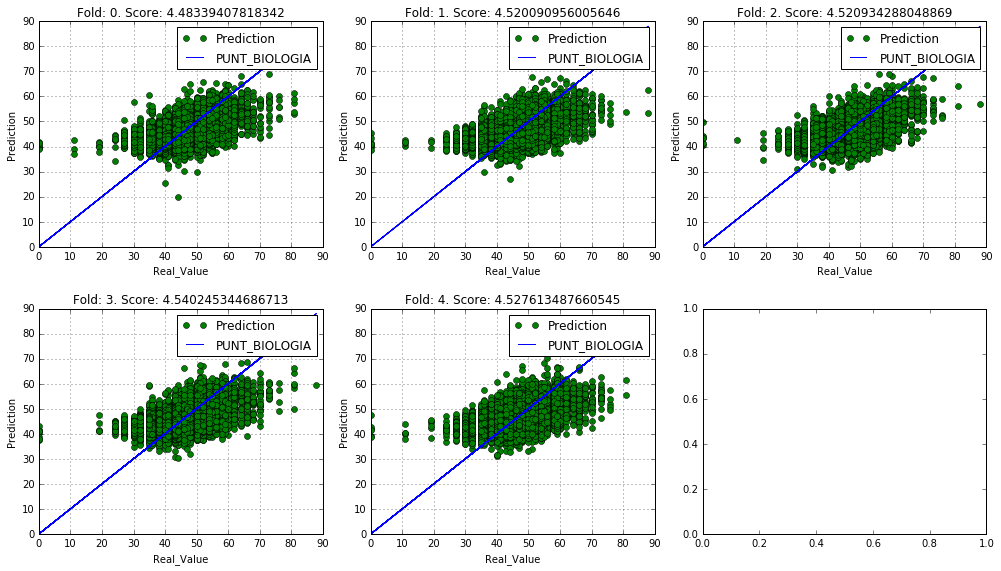

In [ ]:
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)